# **Logistic Regression (Multiclass Classification)**

Logistic regression can handle multiclass classification problems using two primary approaches: **One-vs-Rest (OVR)** and **Multinomial** methods. This explanation outlines these methods and applies them to the Iris dataset.

---

## **1. Multiclass Logistic Regression Approaches**

### **One-vs-Rest (OVR)**:
- The **OVR** method breaks the multiclass problem into multiple binary classification problems.
- For each class, it trains a separate binary logistic regression model to distinguish that class from the rest of the classes.
- Prediction: The class with the highest probability is chosen as the predicted label.
- Advantage: Simple and interpretable.
- Limitation: May struggle with imbalanced datasets or overlapping class boundaries.

### **Multinomial**:
- The **Multinomial** method directly optimizes a multiclass logistic regression model by extending the sigmoid function into the **softmax function**:
  $$ P(y=i|x) = \frac{e^{z_i}}{\sum_{j=1}^{k} e^{z_j}} $$
  where $z_i$ represents the score for class $i$.
- Prediction: Assigns the class with the highest softmax probability.
- Advantage: Provides better performance for multiclass problems as it considers all classes simultaneously.
- Limitation: Computationally more expensive than OVR.

---

## **2. Dataset Overview: Iris Dataset**
- **Features (`x`)**: The dataset's first four columns, representing measurements like sepal length and petal width.
- **Target (`y`)**: The `species` column, representing three distinct flower species:
  - `Setosa`
  - `Versicolor`
  - `Virginica`

---

## **3. Data Visualization**
- A **pairplot** is used to visualize relationships between features, with the points color-coded by species.
- Observations:
  - Features like petal length and petal width may provide good separation between classes.

---

## **4. Implementation and Evaluation**

### **Data Splitting**:
- The data is split into training (`x_train`, `y_train`) and testing (`x_test`, `y_test`) sets using `train_test_split` with a **20% test size** and a random seed for reproducibility.

---

### **OVR Method**:
1. **Model Training**:
   - `multi_class='ovr'` is specified to train a logistic regression model using the OVR approach.
2. **Evaluation**:
   - The model achieves **96.67% accuracy**, indicating its effectiveness in distinguishing between the three classes.

---

### **Multinomial Method**:
1. **Model Training**:
   - `multi_class='multinomial'` is specified to train a logistic regression model using the multinomial approach.
   - The softmax function is used to predict probabilities for all classes simultaneously.
2. **Evaluation**:
   - The model achieves **100% accuracy**, demonstrating that the multinomial approach performs better by considering inter-class relationships.

---

### **Auto Selection**:
- Without specifying the `multi_class` parameter, the solver determines the appropriate method based on the dataset and solver type.
- In this case, it defaults to the multinomial approach and achieves **100% accuracy**.

---

## **5. Logistic Regression Equations**
- **Regression**: The decision boundary for each class is defined as:
  $$ z_i = m_1x_1 + m_2x_2 + \ldots + b_i $$
  where $i$ is the class index.
- **Classification**:
  - For OVR: Sigmoid function is used to compute probabilities for each binary classifier.
  - For Multinomial: Softmax function is used to compute probabilities for all classes.

---

## **6. Conclusion**
- The multinomial approach generally provides superior performance for multiclass problems as it models all classes simultaneously.
- OVR is a simpler alternative that can be effective but may not perform as well for highly imbalanced or overlapping data.
- Logistic regression is a powerful and interpretable method for multiclass classification, achieving excellent results on structured datasets like the Iris dataset.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [4]:
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
iris_data['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

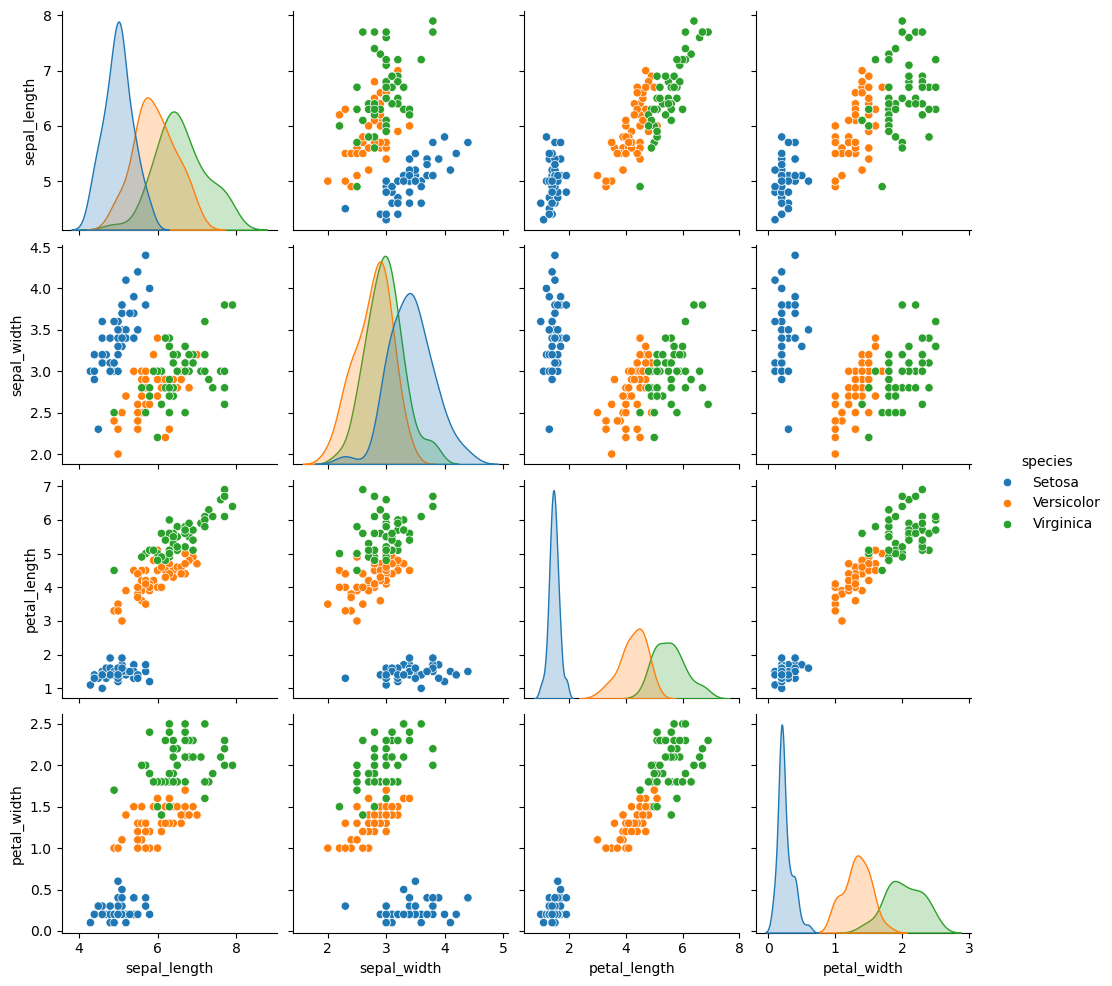

In [8]:
sns.pairplot(data=iris_data, hue='species')
plt.show()

In [9]:
x = iris_data.iloc[:,:-1]
y = iris_data['species']

In [10]:
x_train, x_test, y_train, y_tesst = train_test_split(x, y, test_size=0.2, random_state=42)

### Using OVR Method

In [13]:
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr.fit(x_train, y_train)
lr_ovr.score(x_test, y_tesst)*100

96.66666666666667

In [14]:
lr_mult = LogisticRegression(multi_class='multinomial')
lr_mult.fit(x_train, y_train)
lr_mult.score(x_test, y_tesst) * 100

100.0

### Auto selection

In [15]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_tesst) * 100

100.0